Decision Tree Accuracy: 0.86

Decision Tree Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.93     65605
         1.0       0.00      0.00      0.00     10499

    accuracy                           0.86     76104
   macro avg       0.43      0.50      0.46     76104
weighted avg       0.74      0.86      0.80     76104



C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


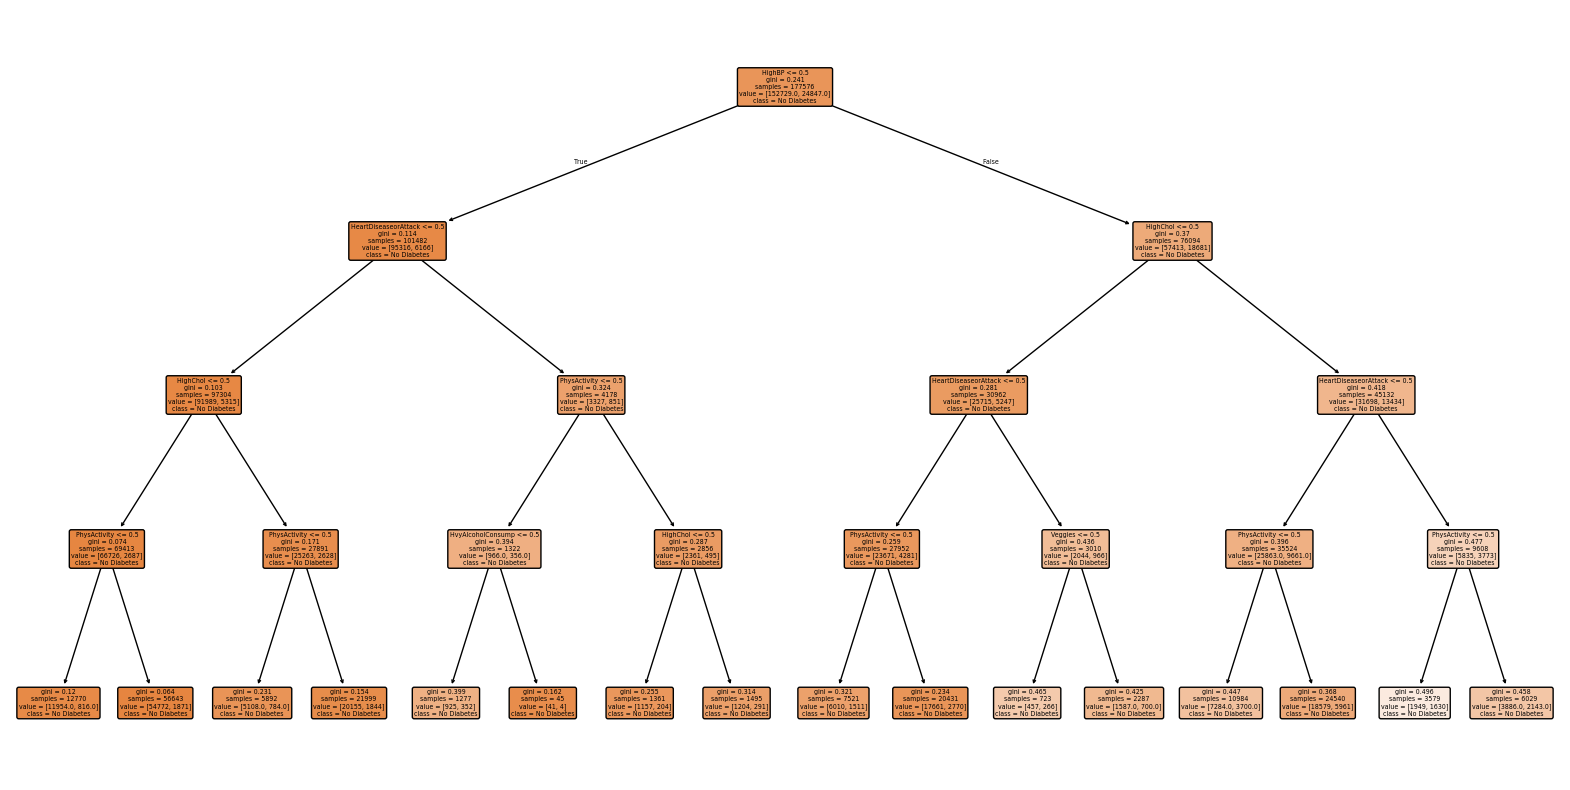

In [16]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

df = pd.read_csv('dataset/dataset1.csv')

X = df[['HighBP', 'HighChol', 'CholCheck','Smoker', 'Stroke','HeartDiseaseorAttack','PhysActivity','Fruits','Veggies','HvyAlcoholConsump','AnyHealthcare','NoDocbcCost']]
y = df['Diabetes_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

y_pred_tree = clf.predict(X_test)
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_tree):.2f}")
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree))

plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], filled=True, rounded=True)
plt.show()


KNN Accuracy (k=5, PCA=2): 0.83

KNN Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90     65605
         1.0       0.23      0.10      0.14     10499

    accuracy                           0.83     76104
   macro avg       0.55      0.52      0.52     76104
weighted avg       0.78      0.83      0.80     76104



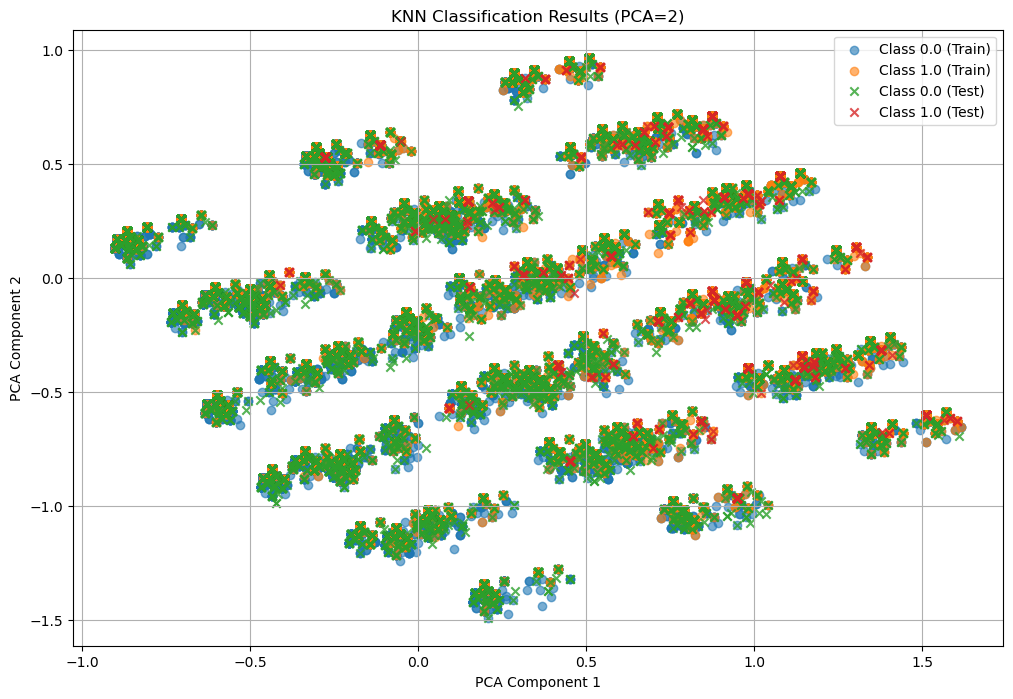

In [17]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Treinar KNN com os dados transformados pelo PCA
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_pca, y_train)

# Previsões
y_pred_knn = knn.predict(X_test_pca)

print(f"\nKNN Accuracy (k={k}, PCA=2): {accuracy_score(y_test, y_pred_knn):.2f}")
print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

plt.figure(figsize=(12, 8))

for class_value in np.unique(y_train):
    mask_train = y_train == class_value
    plt.scatter(X_train_pca[mask_train, 0], X_train_pca[mask_train, 1],
                label=f"Class {class_value} (Train)", alpha=0.6)

for class_value in np.unique(y_pred_knn):
    mask_test = y_pred_knn == class_value
    plt.scatter(X_test_pca[mask_test, 0], X_test_pca[mask_test, 1],
                label=f"Class {class_value} (Test)", alpha=0.8, marker='x')

plt.title("KNN Classification Results (PCA=2)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid()
plt.show()

In [18]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm = SVC(kernel='linear') 
svm.fit(X_train_pca, y_train)

# Previsões
y_pred = svm.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy:.2f}')
print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred))


Acurácia: 0.86

SVM Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.93     65605
         1.0       0.00      0.00      0.00     10499

    accuracy                           0.86     76104
   macro avg       0.43      0.50      0.46     76104
weighted avg       0.74      0.86      0.80     76104



C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
